In [21]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.weights_input_hidden = np.random.randn(
            self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(
            self.hidden_size, self.output_size)

        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.bias_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, X):
        self.hidden_activation = np.dot(
            X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_activation)

        self.output_activation = np.dot(
            self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_activation)

        return self.predicted_output

    def backward(self, X, y, learning_rate):
        output_error = y - self.predicted_output
        output_delta = output_error * \
            self.sigmoid_derivative(self.predicted_output)

        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

        self.weights_hidden_output += np.dot(self.hidden_output.T,
                                             output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0,
                                   keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0,
                                   keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        losses = []  # Store loss for plotting
        for epoch in range(epochs):
            output = self.feedforward(X)
            self.backward(X, y, learning_rate)
            loss = np.mean(np.square(y - output))
            losses.append(loss)
            if epoch % 4000 == 0:
                print(f"Epoch {epoch}, Loss:{loss}")
        return losses # Return losses

In [2]:
def feedforward(self, X):
    self.hidden_activation = np.dot(
        X, self.weights_input_hidden) + self.bias_hidden
    self.hidden_output = self.sigmoid(self.hidden_activation)

    self.output_activation = np.dot(
        self.hidden_output, self.weights_hidden_output) + self.bias_output
    self.predicted_output = self.sigmoid(self.output_activation)

    return self.predicted_output

In [3]:
def backward(self, X, y, learning_rate):
    output_error = y - self.predicted_output
    output_delta = output_error * \
        self.sigmoid_derivative(self.predicted_output)

    hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
    hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

    self.weights_hidden_output += np.dot(self.hidden_output.T,
                                         output_delta) * learning_rate
    self.bias_output += np.sum(output_delta, axis=0,
                               keepdims=True) * learning_rate
    self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
    self.bias_hidden += np.sum(hidden_delta, axis=0,
                               keepdims=True) * learning_rate

In [4]:
def train(self, X, y, epochs, learning_rate):
    for epoch in range(epochs):
        output = self.feedforward(X)
        self.backward(X, y, learning_rate)
        if epoch % 4000 == 0:
            loss = np.mean(np.square(y - output))
            print(f"Epoch {epoch}, Loss:{loss}")

In [14]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train(X, y, epochs=10000, learning_rate=0.1)

output = nn.feedforward(X)
print("Predictions after training:")
print(output)

Epoch 0, Loss:0.29386980845207555
Epoch 4000, Loss:0.018293386359907626
Epoch 8000, Loss:0.003874732498158116
Predictions after training:
[[0.03607028]
 [0.94244883]
 [0.95436549]
 [0.06087101]]


In [17]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train(X, y, epochs=15000, learning_rate=0.1)

output = nn.feedforward(X)
print("Predictions after training:")
print(output)

Epoch 0, Loss:0.2533158143267258
Epoch 4000, Loss:0.009563558536925348
Epoch 8000, Loss:0.0022736192618269596
Epoch 12000, Loss:0.0012186883329945474
Predictions after training:
[[0.02970693]
 [0.97175001]
 [0.96787363]
 [0.02933122]]


In [18]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train(X, y, epochs=15000, learning_rate=0.3)

output = nn.feedforward(X)
print("Predictions after training:")
print(output)

Epoch 0, Loss:0.4202519657352785
Epoch 4000, Loss:0.0015036869138665974
Epoch 8000, Loss:0.0005810308482383813
Epoch 12000, Loss:0.0003530546703072368
Predictions after training:
[[0.00923747]
 [0.98332923]
 [0.98577446]
 [0.02280272]]


Epoch 0, Loss:0.25519531367189763
Epoch 4000, Loss:0.12673218602188707
Epoch 8000, Loss:0.003918286675084242
Epoch 0, Loss:0.3983122448199762
Epoch 4000, Loss:0.0014570583304065042
Epoch 8000, Loss:0.0005471048777488934
Epoch 0, Loss:0.42992426529492117
Epoch 4000, Loss:0.0006427199334940191
Epoch 8000, Loss:0.00027985019074273037


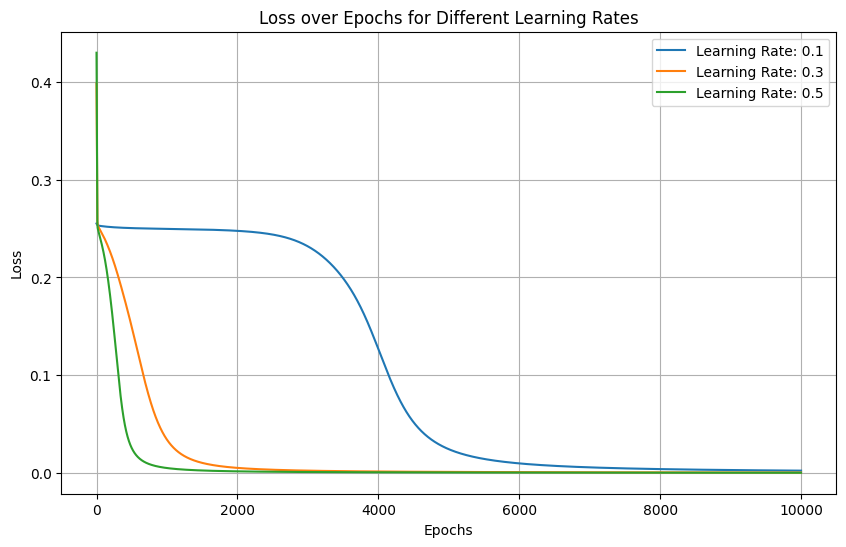

In [20]:
learning_rates = [0.1, 0.3, 0.5]
epochs = 10000
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
    losses = nn.train(X, y, epochs=epochs, learning_rate=lr)
    plt.plot(range(epochs), losses, label=f'Learning Rate: {lr}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

Epoch 0, Loss:0.3545103817017738
Epoch 4000, Loss:0.00993658293938126
Epoch 8000, Loss:0.0027989098281665063
Epoch 0, Loss:0.33889443449434886
Epoch 4000, Loss:0.0019063109427351066
Epoch 8000, Loss:0.0008051437836120629
Epoch 0, Loss:0.2518690981888263
Epoch 4000, Loss:0.0006180035064336306
Epoch 8000, Loss:0.00026361975130634926


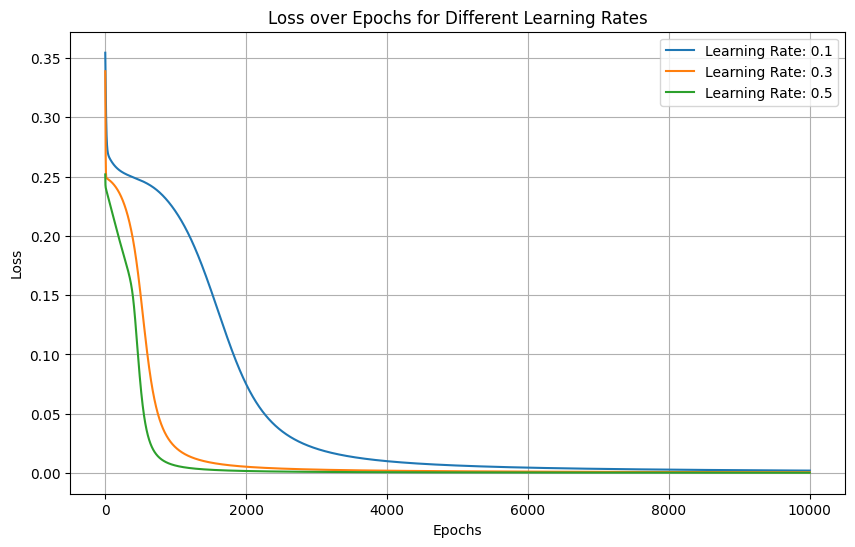

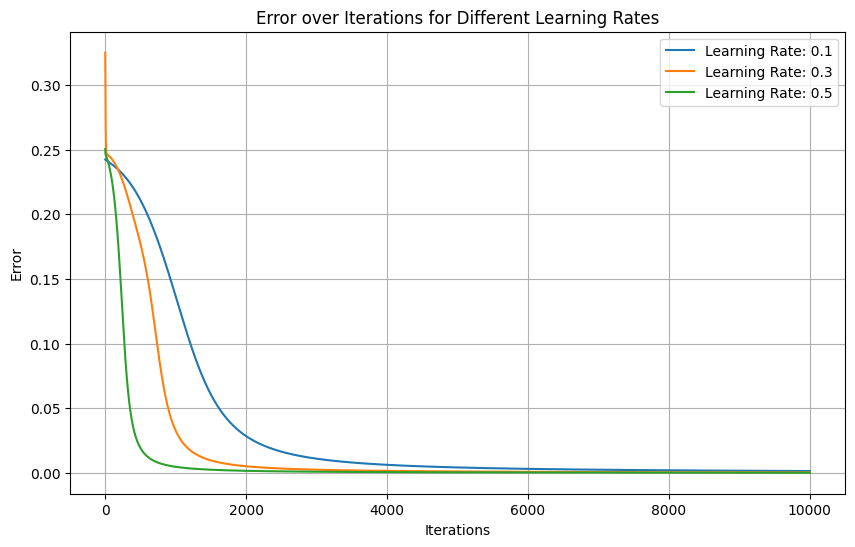

In [23]:
learning_rates = [0.1, 0.3, 0.5]
epochs = 10000
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Plot for Loss vs Epochs
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
    losses = nn.train(X, y, epochs=epochs, learning_rate=lr)
    plt.plot(range(epochs), losses, label=f'Learning Rate: {lr}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

# Plot for Loss vs Iterations
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
    losses = []
    for epoch in range(epochs):
        output = nn.feedforward(X)
        nn.backward(X, y, lr) # Use lr instead of learning_rate
        loss = np.mean(np.square(y - output))
        losses.append(loss)
    plt.plot(range(epochs), losses, label=f'Learning Rate: {lr}') # Epochs are equivalent to iterations in this case

plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error over Iterations for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()